# **ĐỒ ÁN XỬ LÝ NGÔN NGỮ TỰ NHIÊN**
# **Problem Statement**

* Ngày nay, với việc sử dụng email để liên lạc, vấn đề email spam ngày càng trở nên phổ biến. Email spam không chỉ làm lộn xộn hộp thư đến của người dùng mà còn gây ra rủi ro bảo mật bằng cách phát tán phần mềm độc hại,lừa đảo. Để giảm thiểu những rủi ro này và cải thiện trải nghiệm người dùng, cần có một hệ thống tự động hiệu quả và đáng tin cậy có khả năng xác định và lọc chính xác các email spam.
* Đồ án này sẽ phát triển hệ thống máy học để tự động phát hiện email spam trong tập dữ liệu nhất định

# **Objective**

Mục tiêu chính của đồ án này là xây dựng một mô hình phát hiện thư rác mạnh mẽ có thể phân loại chính xác email là thư rác hoặc hữu ích (ham) dựa trên nội dung của chúng.

# **Data Description**

Tập dữ liệu bao gồm một tập hợp các email được gắn nhãn là thư rác (spam) hoặc hợp pháp (ham). Mỗi email được thể hiện với 2 loại chính là nhãn (label) và nội dung (text) trong phần nội dung có chứa địa chỉ email của người gửi, dòng chủ đề, nội dung email. Tập dữ liệu này cung cấp sự phân bổ cân bằng giữa các email spam và email ham, cho phép phát triển một mô hình có thể phân biệt hiệu quả giữa hai loại.

# **Project Work Flow**

**Data Wrangling:**

*  Tải tập dữ liệu chứa cột "nhãn" và "nội dung".
*  Tìm hiểu dữ liệu
*  Xử lý mọi giá trị bị thiếu hoặc trùng lặp nếu có.

**Exploratory Data Analysis (EDA):**

*  Thực hiện phân tích cơ bản để hiểu các đặc điểm của dữ liệu văn bản email.
*  Trực quan hóa dữ liệu email spam và email ham bằng cách sử dụng biểu đồ.
*  Khám phá độ dài của email (số ký tự hoặc từ) trong mỗi danh mục.
*  Xác định các từ khóa hoặc cụm từ phổ biến trong email spam và ham thông qua phân tích tần suất từ.

**Data Preprocessing:**

*  Chuyển đổi dữ liệu văn bản sang chữ thường để đảm bảo tính thống nhất.
*  Xóa mọi ký tự đặc biệt.
*  Mã hóa dữ liệu văn bản thành các từ.
*  Loại bỏ các từ dừng (các từ thường xuất hiện như "và", "the", "is") để giảm noise.
*  Thực hiện rút gọn các từ về dạng gốc của chúng.

**Feature Engineering:**

*  Trích xuất đặc trưng để các thuật toán học máy có thể hiểu được
*  Vector hóa dữ liệu văn bản.

**Splitting the Data:**

*  Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra. Sử dụng tỷ lệ chia 70-30 hoặc 80-20.
*  Đảm bảo rằng chia dữ liệu cho từng nhãn là đồng đều

**Model Building:**

*  Chọn thuật toán học máy phù hợp để phân loại, chẳng hạn như:
*  Naive Bayes
*  Support Vector Machines (SVM)
*  Decision Trees
*  Random Forests
*  Logistic Regression
*  Thử nghiệm 1 số thuật toán học sâu

**Model Evaluation:**

*  Đánh giá mô hình trên tập kiểm tra để có được số liệu hiệu suất khách quan.

**Result and Conclusion**

*  Đưa ra kết luận

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from scipy.stats import randint
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc

[nltk_data] Downloading package punkt to /Users/hoduy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hoduy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hoduy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **`Load Data`**

**Load the dataset**

In [2]:
data_path = "spam_mail.csv"
data = pd.read_csv(data_path)

In [3]:
df = data.copy()
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


**Understanding the data**

`text :-`  Chứa nội dung mail

`label :-` chứa dữ liệu nhãn

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


### **`Exploratory Data Analysis`**
*   Statistics Summary
*   Indentifying Missing values
*   Handling Missing values
*   Removing Duplicate records
*   Visualization

**Statistics Summary**

In [5]:
df.describe().T

,count,unique,top,freq
label,193852,2,Ham,102160
text,193850,193848,unsubscribe,2


In [6]:
df.dtypes

label    object
text     object
dtype: object

In [7]:
len(df['text'].unique())

193849

**Missing Values**



In [8]:
#Check Null values
df.isnull().sum()

label    0
text     2
dtype: int64

In [9]:
#To check if there are any missing values
missing_data=df.isna().any().any()
missing_data

True

Có mất dữ liệu do đó ta cần xử lý dữ liệu

In [10]:
df = df.dropna(axis=0)

In [11]:
missing_data=df.isna().any().any()
missing_data

False

**Duplicate Records**



In [12]:
df.duplicated().sum()

0

Không có trùng lặp

**Change Label to binary**

In [13]:
df['label'] = df['label'].map({'Ham': 0, 'Spam': 1})

In [14]:
df.head()

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [15]:
df["length"] = df["text"].apply(len)
df.head()

,label,text,length
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403
1,0,got ice thought look az original message ice o...,530
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215
3,1,start increasing your odds of success & live s...,345
4,0,author jra date escapenumber escapenumber esca...,3097


**Visualization**

In [16]:
counts = df['label'].value_counts().reset_index()
counts.columns = ['Label', 'Count']
fig = px.bar(counts, x='Label', y='Count', color='Count', text='Count', title='Number of Spam and Ham Emails')
fig.update_layout(title='Number of Spam and Ham Emails', xaxis_title='Label', yaxis_title='Count')
fig.update_xaxes(tickvals=[0, 1], ticktext=['Ham', 'Spam'])
fig.show()

* Nhận thấy không có sự chêch lệch quá nhiều về dữ liệu giữa 2 nhãn


### **`Feature Extraction`**

**TF-IDF Vectorizer**

**TF-IDF (Term Frequency-Inverse Document Frequency)** là một kỹ thuật phổ biến trong xử lý ngôn ngữ tự nhiên (NLP) và tìm kiếm thông tin. TF-IDF được sử dụng để đánh giá tầm quan trọng của một từ trong một tài liệu so với một tập hợp các tài liệu (corpus). Kỹ thuật này kết hợp hai chỉ số chính: Tần suất xuất hiện của từ trong tài liệu (TF) và mức độ thông tin của từ trên toàn bộ tập hợp tài liệu (IDF).

**Term Frequency (TF)**: Đo lường số lần một từ xuất hiện trong một tài liệu. TF có thể được tính theo nhiều cách, nhưng cách đơn giản nhất là đếm số lần xuất hiện của từ trong tài liệu chia cho tổng số từ trong tài liệu đó.

$$
\text{TF}(t, d) = \frac{\text{số lần xuất hiện của từ } t \text{ trong tài liệu } d}{\text{tổng số từ trong tài liệu } d}
$$

**Inverse Document Frequency (IDF)**: Đo lường mức độ phổ biến của từ trong toàn bộ tập hợp tài liệu. IDF có công thức là logarit của tổng số tài liệu chia cho số tài liệu chứa từ đó.

$$
\text{IDF}(t, D) = \log \left(\frac{\text{tổng số tài liệu trong tập } D}{\text{số tài liệu chứa từ } t} + 1\right)
$$


$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$


In [17]:
X = df['text']
tfidf_transformer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_tfidf = tfidf_transformer.fit_transform(X)

### **`Model selction`**

**1.   Split the data into train and test**

Chia theo tỉ lệ 80-20

In [18]:
# Split the dataset to train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2
)

print(f"train dataset features size: {x_train.shape}")
print(f"train dataset label size: {y_train.shape}")

print(f"test dataset features size: {x_test.shape}")
print(f"test dataset label size: {y_test.shape}")

train dataset features size: (155080, 500571)
train dataset label size: (155080,)
test dataset features size: (38770, 500571)
test dataset label size: (38770,)


**2.  classification model**

In [19]:
def evaluate_model(model, x_test, y_test, model_name="Model"):
  y_pred = model.predict(x_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate various performance metrics
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred, output_dict=True)
  metrics = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1,
        "Classification Report": classification_rep
    }
  # Print evaluation metrics
  print(f"\033[1m EVALUATION METRICS ({model_name}) \033[0m")
  print(f"\n \033 ---------------------------------------------------------------- \033[0m")
  print("\nTrue Positives (TP):", TP)
  print("True Negatives (TN):", TN)
  print("False Positives (FP):", FP)
  print("False Negatives (FN):", FN)
  print("\nAccuracy   : ", accuracy)
  print("Recall       : ", recall)
  print("Precision    : ", precision)
  print("F1-score     : ", f1)
  print(f" \033 ---------------------------------------------------------------- \033[0m")

  # Print classification report
  print("\033[1m Classification Report: \033[0m")
  print(classification_report(y_test, y_pred))
  print(f"\n \033 ---------------------------------------------------------------- \033[0m")
  print("\033[1m Confusion Matrix \033[0m")
  # Plot the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot(cmap='bone_r')  # specify the colormap for better visualization
  plt.show()
  return metrics,y_pred

 EVALUATION METRICS (Logistic Regression) 

  ---------------------------------------------------------------- 

True Positives (TP): 18088
True Negatives (TN): 19955
False Positives (FP): 508
False Negatives (FN): 219

Accuracy   :  0.981248387928811
Recall       :  0.9880373627574152
Precision    :  0.9726822972682297
F1-score     :  0.9802997046310598
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     20463
           1       0.97      0.99      0.98     18307

    accuracy                           0.98     38770
   macro avg       0.98      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770


  ---------------------------------------------------------------- 
 Confusion Matrix 


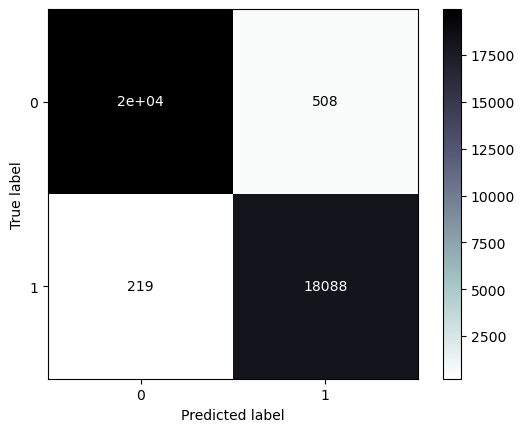

In [20]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)
lr_metrics,y_pred_lr = evaluate_model(LogisticRegression_model, x_test, y_test, model_name="Logistic Regression")

In [21]:
lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_rfc = auc(lr_fpr, lr_tpr)
print("AUC Score: ", auc_rfc)

AUC Score:  0.9816060341617794


 EVALUATION METRICS (Decision Tree) 

  ---------------------------------------------------------------- 

True Positives (TP): 17736
True Negatives (TN): 20001
False Positives (FP): 462
False Negatives (FN): 571

Accuracy   :  0.973355687387155
Recall       :  0.96880974490632
Precision    :  0.9746125947906363
F1-score     :  0.9717025065059581
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20463
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770


  ---------------------------------------------------------------- 
 Confusion Matrix 


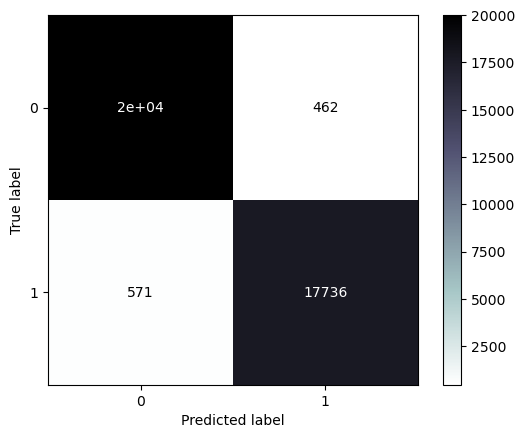

In [22]:
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(x_train, y_train)
dt_metrics,y_pred_dt = evaluate_model(DecisionTree_model, x_test, y_test, model_name="Decision Tree")

In [23]:
dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_rfc = auc(dt_fpr, dt_tpr)
print("AUC Score: ", auc_rfc)

AUC Score:  0.9731162051023317


 EVALUATION METRICS (Random Forest) 

  ---------------------------------------------------------------- 

True Positives (TP): 17857
True Negatives (TN): 20321
False Positives (FP): 142
False Negatives (FN): 450

Accuracy   :  0.9847304616971886
Recall       :  0.975419238542634
Precision    :  0.9921106728151564
F1-score     :  0.9836941552360492
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20463
           1       0.99      0.98      0.98     18307

    accuracy                           0.98     38770
   macro avg       0.99      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770


  ---------------------------------------------------------------- 
 Confusion Matrix 


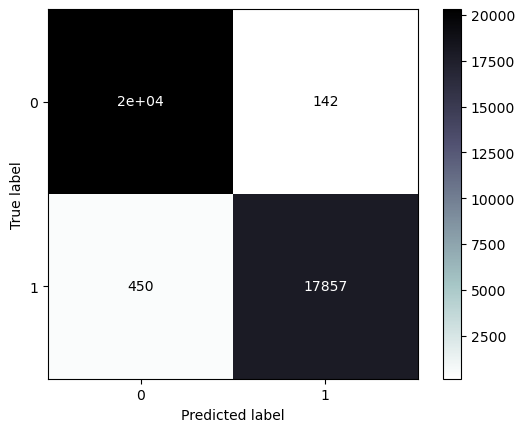

In [24]:
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(x_train, y_train)
rf_metrics,y_pred_rf = evaluate_model(RandomForest_model, x_test, y_test, model_name="Random Forest")

In [26]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rfc = auc(rf_fpr, rf_tpr)
print("AUC Score: ", auc_rfc)

AUC Score:  0.9842399422933568


### **`Result:`**

Ta sẽ so sánh kết quả của những mô hình đã chạy gồm Logistic Regression, Decision Tree, Random Forest

Đối với những mô hình như SVM việc huấn luyện mô hình quá tốn tài nguyên (đã thực nghiệm) nên sẽ không thể hiện ở đây

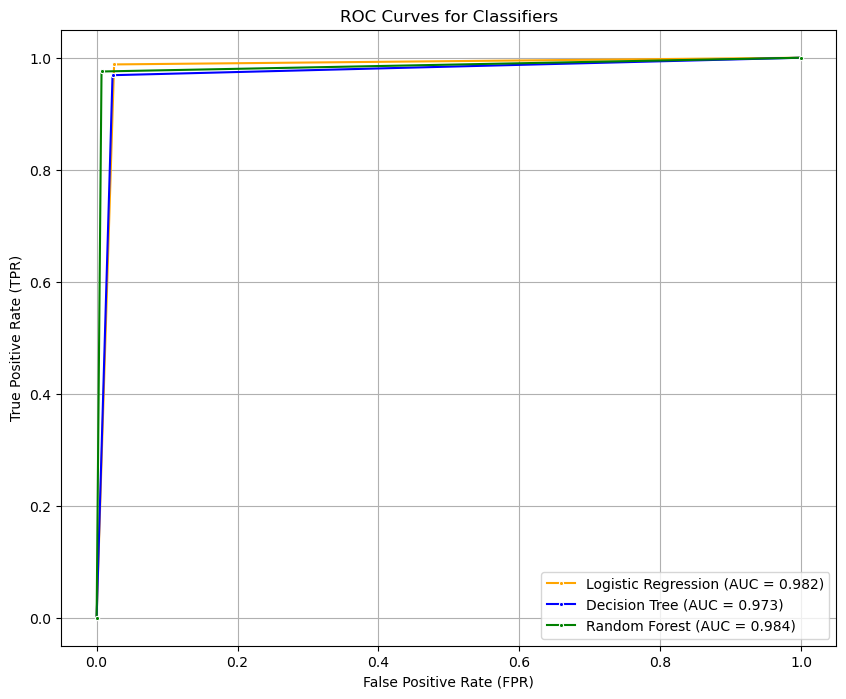

In [27]:
classifiers = {
    'Logistic Regression': (y_pred_lr, lr_fpr, lr_tpr),
    'Decision Tree': (y_pred_dt, dt_fpr, dt_tpr),
    'Random Forest': (y_pred_rf, rf_fpr, rf_tpr)
}

plt.figure(figsize=(10, 8), dpi=100)
colors=['orange', 'blue', 'green']


for i, (clf_name, (y_pred, fpr, tpr)) in enumerate(classifiers.items()):
    auc_score = roc_auc_score(y_test, y_pred) 
    sns.lineplot(x=fpr, y=tpr, marker='.', label=f'{clf_name} (AUC = {auc_score:.3f})', color=colors[i])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Classifiers')
plt.grid(True)
plt.legend()
plt.show()

### **`Conclusion:`**
Đối với các mô hình máy học, cả 3 mô hình đã thử nghiệm đều cho một kết quả rất tốt trong đó Logistic Regression chạy nhanh nhất và kết quả không chênh lệch quá nhiều so với mô hình có kết quả cao nhất là Random Forest. 

Ở đồ án này Random Forest sẽ được chọn vì có False Positives thấp nhất (tức là email ham bị nhầm thành spam thấp nhất) để tránh cho việc những email quan trọng của người dùng bị đánh dấu là spam.

### **`Build Pipeline:`**

In [31]:
# Tạo 1 pipeline dùng TfidfVectorizer và mô hình Random Forest đã train ở trên
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_transformer),
    ('rf', RandomForest_model)
])

# Lưu pipeline đã tạo
import joblib
joblib.dump(pipeline, 'spam_mail_classifier.joblib')

['spam_mail_classifier.joblib']